# how to import dev phenom

In [1]:
import sys

In [2]:
sys.path.insert(0, "/home/sebastian.khan/git/phenom/")

In [3]:
import phenom

In [4]:
phenom.__file__

'/home/sebastian.khan/git/phenom/phenom/__init__.py'

In [5]:
import numpy as np

In [6]:
def cart_to_polar(x, y, z):
    """
    cartesian to spherical polar transformation.
    phi (azimuthal angle) between [0, 2*pi]
    returns: r, theta, phi
    """
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    theta = np.arctan2(hxy, z)
    phi = np.arctan2(y, x)
    phi = phi % (2 * np.pi)
    return r, theta, phi


def polar_to_cart(r, theta, phi):
    """
    spherical polar to cartesian transformation
    returns: x, y, z
    """
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

In [7]:
m1 = 80
m2 = 20
chi1x, chi1y, chi1z = polar_to_cart(0.79998044, np.arccos(-0.00692658), 0)
print(chi1x, chi1y, chi1z)

0.7999612492348375 0.0 -0.005541128516095268


# example PhenomD amp and phase

initialising instance of PhenomD class
physical parameters of the instance:
ph.p['m1'] =  80.0
ph.p['m2'] =  20.0
ph.p['chi1z'] =  -0.005541128516095268
ph.p['chi2z'] =  0.0

f_min =  10.0
f_max =  406.0508870342998
delta_f =  0.125
generate htilde with 'ph.IMRPhenomDGenerateFD()'
get amplitude and phase from htilde with 'ph.getampandphase(htilde)'
output frequency series = ph.flist_Hz.
to get the frequencies in dimensionless (geometric) frequencies use
phenom.HztoMf(ph.flist_Hz, ph.p['Mtot'])
test plots


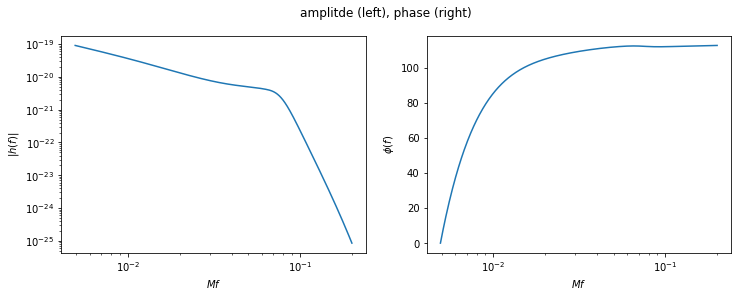

In [8]:
print( "initialising instance of PhenomD class")
ph = phenom.PhenomD(m1=m1, m2=m2, chi1z=chi1z, f_min=10, delta_f=1./8.)


print ("physical parameters of the instance:")
print ("ph.p['m1'] = ", ph.p['m1'])
print ("ph.p['m2'] = ", ph.p['m2'])
print ("ph.p['chi1z'] = ", ph.p['chi1z'])
print ("ph.p['chi2z'] = ", ph.p['chi2z'])

print ("")

print ("f_min = ", ph.p['f_min'])
print ("f_max = ", ph.p['f_max'])
print ("delta_f = ", ph.p['delta_f'])

print ("generate htilde with 'ph.IMRPhenomDGenerateFD()'")
ph.IMRPhenomDGenerateFD()

print ("get amplitude and phase from htilde with 'ph.getampandphase(htilde)'")
ph.getampandphase(ph.htilde)

print ("output frequency series = ph.flist_Hz.")
print ("to get the frequencies in dimensionless (geometric) frequencies use")
print ("phenom.HztoMf(ph.flist_Hz, ph.p['Mtot'])")


print ("test plots")

import matplotlib
# matplotlib.use('MacOSX')
import matplotlib.pyplot as plt
import numpy as np
from phenom.utils.utils import HztoMf

f_in_Mf = HztoMf(ph.flist_Hz, ph.p['m1']+ph.p['m2'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
fig.suptitle('amplitde (left), phase (right)')

ax[0].plot(f_in_Mf, ph.amp)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('$|h(f)|$')
ax[0].set_xlabel('$Mf$')

ax[1].plot(f_in_Mf, ph.phase)
ax[1].set_xscale('log')
ax[1].set_ylabel('$\phi(f)$')
ax[1].set_xlabel('$Mf$')

# fig.tight_layout()
# plt.savefig('./amp-and-phase-example-plot.png')
plt.show()

In [9]:
ph.p.keys()

dict_keys(['m1', 'm2', 'chi1z', 'chi2z', 'f_min', 'f_max', 'delta_f', 'distance', 'fRef', 'phiRef', 'Mtot', 'eta', 'chipn'])

# example PhenomD coprec amp and phase

In [10]:
from phenom.waveform import phenomD_coprec as pdc

initialising instance of PhenomD COPREC class
physical parameters of the instance:
ph.p['m1'] =  80.0
ph.p['m2'] =  20.0
ph.p['chi1z'] =  -0.005541128516095268
ph.p['chi2z'] =  0.0

f_min =  10.0
f_max =  406.0508870342998
delta_f =  0.125
generate htilde with 'ph.IMRPhenomDGenerateFD()'
get amplitude and phase from htilde with 'ph.getampandphase(htilde)'
output frequency series = ph.flist_Hz.
to get the frequencies in dimensionless (geometric) frequencies use
phenom.HztoMf(ph.flist_Hz, ph.p['Mtot'])
test plots


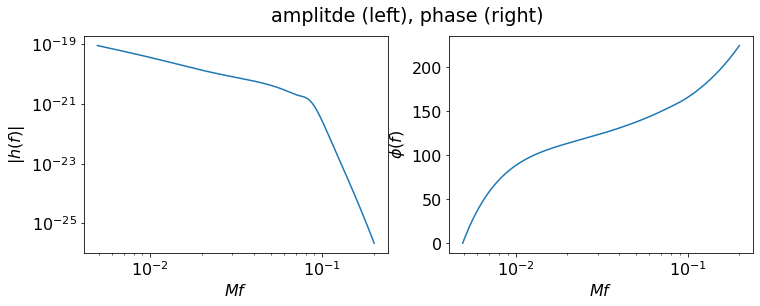

In [11]:
print( "initialising instance of PhenomD COPREC class")
ph_coprec = pdc.PhenomDCOPREC(m1=m1, m2=m2, chi1x=chi1x, chi1z=chi1z, f_min=10, delta_f=1./8.)


print ("physical parameters of the instance:")
print ("ph.p['m1'] = ", ph_coprec.p['m1'])
print ("ph.p['m2'] = ", ph_coprec.p['m2'])
print ("ph.p['chi1z'] = ", ph_coprec.p['chi1z'])
print ("ph.p['chi2z'] = ", ph_coprec.p['chi2z'])

print ("")

print ("f_min = ", ph_coprec.p['f_min'])
print ("f_max = ", ph_coprec.p['f_max'])
print ("delta_f = ", ph_coprec.p['delta_f'])

print ("generate htilde with 'ph.IMRPhenomDGenerateFD()'")
ph_coprec.IMRPhenomDGenerateFD()

print ("get amplitude and phase from htilde with 'ph.getampandphase(htilde)'")
ph_coprec.getampandphase(ph_coprec.htilde)

print ("output frequency series = ph.flist_Hz.")
print ("to get the frequencies in dimensionless (geometric) frequencies use")
print ("phenom.HztoMf(ph.flist_Hz, ph.p['Mtot'])")


print ("test plots")

import matplotlib
# matplotlib.use('MacOSX')
import matplotlib.pyplot as plt
import numpy as np
from phenom.utils.utils import HztoMf

ph_coprec_f_in_Mf = HztoMf(ph_coprec.flist_Hz, ph_coprec.p['m1']+ph_coprec.p['m2'])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
fig.suptitle('amplitde (left), phase (right)')

ax[0].plot(ph_coprec_f_in_Mf, ph_coprec.amp)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylabel('$|h(f)|$')
ax[0].set_xlabel('$Mf$')

ax[1].plot(ph_coprec_f_in_Mf, ph_coprec.phase)
ax[1].set_xscale('log')
ax[1].set_ylabel('$\phi(f)$')
ax[1].set_xlabel('$Mf$')

# fig.tight_layout()
# plt.savefig('./amp-and-phase-example-plot.png')
plt.show()

In [12]:
ph_coprec.p.keys()

dict_keys(['m1', 'm2', 'chi1x', 'chi1y', 'chi1z', 'chi2x', 'chi2y', 'chi2z', 'f_min', 'f_max', 'delta_f', 'distance', 'fRef', 'phiRef', 'chip', 'Mtot', 'eta', 'chipn', 'chi1', 'theta1', 'phi1', 'costheta1'])

## compare

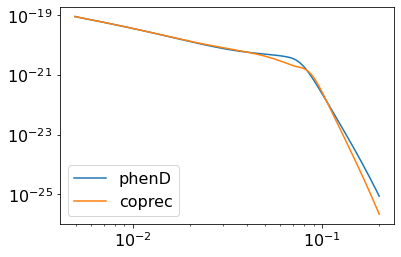

In [13]:
plt.figure()
plt.plot(f_in_Mf, ph.amp, label='phenD')
plt.plot(f_in_Mf, ph_coprec.amp, label='coprec')
plt.yscale('log')
plt.xscale('log')
plt.legend()

In [14]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS

In [15]:
pd_dphase = IUS(f_in_Mf, ph.phase).derivative()(f_in_Mf)
coprec_dphase = IUS(ph_coprec_f_in_Mf, ph_coprec.phase).derivative()(f_in_Mf)

(44500.0, 46000.0)

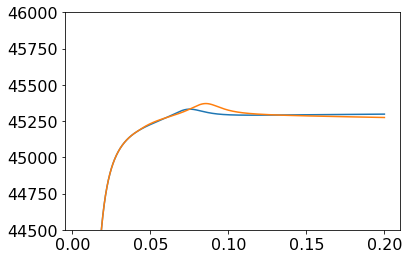

In [19]:
plt.figure()
plt.plot(f_in_Mf, -(pd_dphase-pd_dphase[0]))
plt.plot(f_in_Mf, -(coprec_dphase-coprec_dphase[0]))
plt.ylim(44500, 46000)

# dev how to call pickled models

the coprec fits are functions of:

    - eta
    - cos(theta)
    - chi1_mag
    
so we need to convert from cartesian spins to these

In [25]:
import psf
import scale
import os

In [26]:
from ansatz import ampmrd_func, dphimrd_func

from lmfit import Model, Parameter, report_fit

In [48]:
def coprec_alpha1Fit(p):
    eta = p['eta']
    costheta1 = p['costheta1']
    chi1 = p['chi1']
    
    parname = 'a1'
    
    coords = np.array([eta, costheta1, chi1]).reshape(1,-1)
    
    phase_X_scalers = scale.load_scalers(os.path.join("phase", parname, "X_scalers.npy"))
    phase_Y_scalers = scale.load_scalers(os.path.join("phase", parname, "Y_scalers.npy"))
    
    par_model_high = psf.load_model(filename=f'phase_high/{parname}/model.pickle')
    scaled_coords = scale.apply_scaler(coords, phase_X_scalers)
    scaled_yhat = par_model_high.predict(scaled_coords.reshape(1,-1))
    yhat = scale.apply_inverse_scaler(scaled_yhat.reshape(-1,1), phase_Y_scalers)[:,0]
    return yhat

In [49]:
coprec_alpha1Fit({'eta':0.1600004, 'costheta1':-0.00692658, 'chi1':0.79998044})

array([-668.65139071])

In [ ]:
def get_coprec_dphi_mrd_coefficients()

In [ ]:
model = Model(dphimrd_func, independent_vars=['f'])

bf_params = model.make_params()

bf_params['fdamp'].value = wf.fdamp
bf_params['fdamp'].vary=False

bf_params['frd'].value = wf.fring
bf_params['frd'].vary=False

bf_params['a1'].value = bf_coeffs[0]
bf_params['a1'].vary=False

bf_params['a2'].value = bf_coeffs[1]
bf_params['a2'].vary=False

bf_params['a3'].value = bf_coeffs[2]
bf_params['a3'].vary=False

bf_params['a4'].value = bf_coeffs[3]
bf_params['a4'].vary=False

bf_params['a5'].value = bf_coeffs[4]
bf_params['a5'].vary=False

bf_params['a6'].value = 1
bf_params['a6'].vary=False

y_bf = model.eval(bf_params, f=x)

# model
parnames = ['a1', 'a2', 'a3', 'a4', 'a5']
fit_coeffs = dict(a6=1, fdamp=wf.fdamp, frd=wf.fring)

bf_coords = bf_coords.reshape(1,-1)

for parname in parnames:    
    par_model_high = psf.load_model(filename=f'phase_high/{parname}/model.pickle')
    bf_scaled_coords = scale.apply_scaler(bf_coords, phase_X_scalers[parname])
    scaled_yhat = par_model_high.predict(bf_scaled_coords.reshape(1,-1))
    yhat = scale.apply_inverse_scaler(scaled_yhat.reshape(-1,1), phase_Y_scalers[parname])[:,0]
    fit_coeffs.update({parname:yhat})
y_model_high = model.eval(f=x, **fit_coeffs)

In [18]:
np.array([1,2,3]).reshape(1,-1)

array([[1, 2, 3]])